In [1]:
# Importar las librerias necesarias para la explración de datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Análisis Exploratorio de datos (EDA) - Conjunto con outliers y sin outliers

In [3]:
# Cargamos el conjunto de datos con ountliers
df_troll_2024_con_outliers = pd.read_csv('../data/processed/troll_a_2024_con_outliers.csv')
df_troll_2024_con_outliers.head(10)

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN
0,1087799999,2024-01-01,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",3.777778,-2.944444,9999.9,999.9,0.997791,50.5596,62.9680,1851.8148,5.0,2.0
1,1087799999,2024-01-02,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",1.888889,-5.277778,9999.9,999.9,0.997791,51.3004,66.4868,1851.8148,3.0,0.0
2,1087799999,2024-01-03,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",-0.222222,-8.277778,9999.9,999.9,0.997791,33.1508,53.5228,1851.8148,1.0,-1.0
3,1087799999,2024-01-04,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",0.388889,-6.277778,9999.9,999.9,0.981697,34.8176,48.1520,1851.8148,1.0,-1.0
4,1087799999,2024-01-05,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",-0.388889,-7.777778,9999.9,999.9,0.997791,27.7800,42.4108,1851.8148,0.0,-1.0
5,1087799999,2024-01-06,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",0.722222,-5.777778,9999.9,999.9,0.997791,32.5952,51.8560,1851.8148,2.0,0.0
6,1087799999,2024-01-07,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",2.833333,0.166667,9999.9,999.9,0.981697,48.5224,59.4492,1851.8148,4.0,2.0
7,1087799999,2024-01-08,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",4.444444,2.666667,9999.9,999.9,0.869044,26.4836,37.0400,1851.8148,6.0,3.0
8,1087799999,2024-01-09,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",5.388889,3.111111,9999.9,999.9,0.997791,30.1876,57.5972,1851.8148,6.0,5.0
9,1087799999,2024-01-10,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",6.277778,1.777778,9999.9,999.9,0.997791,61.6716,68.3388,1851.8148,7.0,6.0


In [5]:
# Cargamos el conjunto de datos sin outliers
df_troll_2024_sin_outliers = pd.read_csv('../data/processed/troll_a_2024_sin_outliers.csv')
df_troll_2024_sin_outliers.head(10)

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN
0,1087799999,2024-01-01,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",3.777778,-2.944444,9999.9,999.9,0.997791,50.5596,62.9680,1851.8148,5.0,2.0
1,1087799999,2024-01-02,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",1.888889,-5.277778,9999.9,999.9,0.997791,51.3004,66.4868,1851.8148,3.0,0.0
2,1087799999,2024-01-03,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",-0.222222,-8.277778,9999.9,999.9,0.997791,33.1508,53.5228,1851.8148,1.0,-1.0
3,1087799999,2024-01-04,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",0.388889,-6.277778,9999.9,999.9,0.981697,34.8176,48.1520,1851.8148,1.0,-1.0
4,1087799999,2024-01-05,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",-0.388889,-7.777778,9999.9,999.9,0.997791,27.7800,42.4108,1851.8148,0.0,-1.0
5,1087799999,2024-01-06,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",0.722222,-5.777778,9999.9,999.9,0.997791,32.5952,51.8560,1851.8148,2.0,0.0
6,1087799999,2024-01-07,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",2.833333,0.166667,9999.9,999.9,0.981697,48.5224,59.4492,1851.8148,4.0,2.0
7,1087799999,2024-01-08,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",4.444444,2.666667,9999.9,999.9,0.869044,26.4836,37.0400,1851.8148,6.0,3.0
8,1087799999,2024-01-09,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",5.388889,3.111111,9999.9,999.9,0.997791,30.1876,57.5972,1851.8148,6.0,5.0
9,1087799999,2024-01-10,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",6.277778,1.777778,9999.9,999.9,0.997791,61.6716,68.3388,1851.8148,7.0,6.0


In [ ]:
# Tranformamos el tipo de dato de la columna DATE de object a datetime (conjunto de datos con ountliers)
df_troll_2024_con_outliers['DATE'] = pd.to_datetime(df_troll_2024_con_outliers['DATE'])
df_troll_2024_con_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    354 non-null    int64         
 1   DATE       354 non-null    datetime64[ns]
 2   LATITUDE   354 non-null    float64       
 3   LONGITUDE  354 non-null    float64       
 4   ELEVATION  354 non-null    float64       
 5   NAME       354 non-null    object        
 6   TEMP       354 non-null    float64       
 7   DEWP       354 non-null    float64       
 8   SLP        354 non-null    float64       
 9   STP        354 non-null    float64       
 10  VISIB      354 non-null    float64       
 11  WDSP       354 non-null    float64       
 12  MXSPD      354 non-null    float64       
 13  GUST       354 non-null    float64       
 14  MAX        354 non-null    float64       
 15  MIN        354 non-null    float64       
dtypes: datetime64[ns](1), float64(13), int64(1),

In [6]:
# Transformamos el tipo de dato de la columna DATE de object a datetime (conjunto de datos sin outliers)
df_troll_2024_sin_outliers['DATE'] = pd.to_datetime(df_troll_2024_sin_outliers['DATE'])
df_troll_2024_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    281 non-null    int64         
 1   DATE       281 non-null    datetime64[ns]
 2   LATITUDE   281 non-null    float64       
 3   LONGITUDE  281 non-null    float64       
 4   ELEVATION  281 non-null    float64       
 5   NAME       281 non-null    object        
 6   TEMP       281 non-null    float64       
 7   DEWP       281 non-null    float64       
 8   SLP        281 non-null    float64       
 9   STP        281 non-null    float64       
 10  VISIB      281 non-null    float64       
 11  WDSP       281 non-null    float64       
 12  MXSPD      281 non-null    float64       
 13  GUST       281 non-null    float64       
 14  MAX        281 non-null    float64       
 15  MIN        281 non-null    float64       
dtypes: datetime64[ns](1), float64(13), int64(1),

##### Media, mediana y desvición estándar (conjuntos de datos con outliers y sin outliers)

In [9]:
def calculo_media(df,lista_columnas):
    media_temp = {}

    for columna in lista_columnas:
        if columna in df.columns: # Manejo de columnas inexistentes
            media_temp[columna] = df[columna].mean()
        else:
            media_temp[columna] = None # Algún otro valor para indicar que no existe
    return media_temp

In [23]:
col_lista = ['TEMP','DEWP','SLP','STP','VISIB','WDSP','MXSPD','GUST','MAX','MIN']

dic1 = calculo_media(df_troll_2024_con_outliers,col_lista)
dic2 = calculo_media(df_troll_2024_sin_outliers,col_lista)

print(f'Los valores de Media del conjunto con outliers')
print(f'{'Columnas':<10}-> {'Media':<10}')
for col, val in dic1.items():
    print(f'{col:<10}-> {val:<10.4f}')

print(f'\nLos valores de Media del conjunto sin outliers')
print(f'{'Columnas':<10}-> {'Media':<10}')
for col, val in dic2.items():
    print(f'{col:<10}-> {val:<10.4f}')

Los valores de Media del conjunto con outliers
Columnas  -> Media     
TEMP      -> 9.0884    
DEWP      -> 5.5395    
SLP       -> 9999.9000 
STP       -> 999.9000  
VISIB     -> 0.9017    
WDSP      -> 39.2671   
MXSPD     -> 58.1486   
GUST      -> 1638.3582 
MAX       -> 41.8685   
MIN       -> 54.4327   

Los valores de Media del conjunto sin outliers
Columnas  -> Media     
TEMP      -> 9.2981    
DEWP      -> 5.5178    
SLP       -> 9999.9000 
STP       -> 999.9000  
VISIB     -> 0.9615    
WDSP      -> 36.4752   
MXSPD     -> 54.9602   
GUST      -> 1851.8148 
MAX       -> 10.8683   
MIN       -> 7.7758    


* Se observan diferencias notables en las medias de las columnas 'VISIB', 'WDSP', 'MXSPD', 'GUST', 'MAX' y 'MIN' entre los dos conjuntos de datos. **Esto indica que los outliers tiene un impacto significativo en la media de estas variables.**
* La medias de 'SLP' y'STP' son identicasen ambos conjuntos.
* Las columnas 'TEMP' y 'DEWP' sus medias tiene muy poca variación en sus datos.

In [25]:
def calculo_mediana(df,lista_columnas):
    mediana_temp = {}

    for columna in lista_columnas:
        if columna in df.columns: # Manejo de columnas inexistentes
            mediana_temp[columna] = df[columna].mean()
        else:
            mediana_temp[columna] = None # Algún otro valor para indicar que no existe
    return mediana_temp

In [28]:
dic3 = calculo_mediana(df_troll_2024_con_outliers,col_lista)
dic4 = calculo_mediana(df_troll_2024_sin_outliers,col_lista)

print(f'Los valores de Mediana del conjunto con outliers')
print(f'{'Columnas':<10}-> {'Mediana':<10}')
for col, val in dic3.items():
    print(f'{col:<10}-> {val:<10.4f}')

print(f'\nLos valores de Mediana del conjunto sin outliers')
print(f'{'Columnas':<10}-> {'Mediana':<10}')
for col, val in dic4.items():
    print(f'{col:<10}-> {val:<10.4f}')

Los valores de Mediana del conjunto con outliers
Columnas  -> Mediana   
TEMP      -> 9.0884    
DEWP      -> 5.5395    
SLP       -> 9999.9000 
STP       -> 999.9000  
VISIB     -> 0.9017    
WDSP      -> 39.2671   
MXSPD     -> 58.1486   
GUST      -> 1638.3582 
MAX       -> 41.8685   
MIN       -> 54.4327   

Los valores de Mediana del conjunto sin outliers
Columnas  -> Mediana   
TEMP      -> 9.2981    
DEWP      -> 5.5178    
SLP       -> 9999.9000 
STP       -> 999.9000  
VISIB     -> 0.9615    
WDSP      -> 36.4752   
MXSPD     -> 54.9602   
GUST      -> 1851.8148 
MAX       -> 10.8683   
MIN       -> 7.7758    


* Se observan diferencias notables en las medianas de las columnas 'VISIB', 'WDSP', 'MXSPD', 'GUST', 'MAX' y 'MIN' entre los dos conjuntos de datos. **Esto indica que los outliers tiene un impacto significativo en la mediana de estas variables.**
* La mediana de 'SLP' y'STP' son identicasen ambos conjuntos.
* Las columnas 'TEMP' y 'DEWP' sus medianas tiene muy poca variación en sus datos.

In [29]:
def calculo_desviacion_std(df,lista_columnas):
    mediana_temp = {}

    for columna in lista_columnas:
        if columna in df.columns: # Manejo de columnas inexistentes
            mediana_temp[columna] = df[columna].std()
        else:
            mediana_temp[columna] = None # Algún otro valor para indicar que no existe
    return mediana_temp

In [30]:
dic5 = calculo_desviacion_std(df_troll_2024_con_outliers,col_lista)
dic6 = calculo_desviacion_std(df_troll_2024_sin_outliers,col_lista)

print(f'Los valores de la desviación estándar del conjunto con outliers')
print(f'{'Columnas':<10}-> {'Desviación estándar':<10}')
for col, val in dic5.items():
    print(f'{col:<10}-> {val:<10.4f}')

print(f'\nLos valores de la desviación estándar del conjunto sin outliers')
print(f'{'Columnas':<10}-> {'Desviación estándar':<10}')
for col, val in dic6.items():
    print(f'{col:<10}-> {val:<10.4f}')

Los valores de la desviación estándar del conjunto con outliers
Columnas  -> Desviación estándar
TEMP      -> 4.2897    
DEWP      -> 4.8250    
SLP       -> 0.0000    
STP       -> 0.0000    
VISIB     -> 0.1440    
WDSP      -> 17.3190   
MXSPD     -> 21.4519   
GUST      -> 574.9235  
MAX       -> 414.8775  
MIN       -> 507.6653  

Los valores de la desviación estándar del conjunto sin outliers
Columnas  -> Desviación estándar
TEMP      -> 4.4017    
DEWP      -> 4.8515    
SLP       -> 0.0000    
STP       -> 0.0000    
VISIB     -> 0.0527    
WDSP      -> 15.5121   
MXSPD     -> 19.6816   
GUST      -> 0.0000    
MAX       -> 4.7480    
MIN       -> 4.2907    


* Se observan diferencias notables en la desviación estándar de las columnas 'VISIB', 'WDSP', 'MXSPD', 'GUST', 'MAX' y 'MIN' entre los dos conjuntos de datos. **Esto indica que los outliers tiene un impacto significativo en la desviación estándar de estas variables.**
* La desviación estándar de 'SLP' y'STP' son identicasen ambos conjuntos.
* Las columnas 'TEMP' y 'DEWP' su desviación estándar tiene muy poca variación en sus datos.

##### Distribución de las variables

In [ ]:
def visualizar_distribucion_comparativa(df_con_outliers, df_sin_outliers, lista_columnas):

    for columna in lista_columnas:
        plt.figure(figsize=(18, 6))

        # Histograma comparativo
        plt.subplot(1, 2, 1)
        sns.histplot(df_con_outliers[columna], kde=True, label='Con outliers', color='skyblue')
        sns.histplot(df_sin_outliers[columna], kde=True, label='Sin outliers', color='salmon')
        plt.title(f'Histograma comparativo de {columna}')
        plt.legend()

        # Boxplot comparativo
        plt.subplot(1, 2, 2)
        sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],
                    palette=['skyblue', 'salmon'])
        plt.xticks([0, 1], ['Con outliers', 'Sin outliers'])
        plt.title(f'Boxplot comparativo de {columna}')

        plt.show()

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


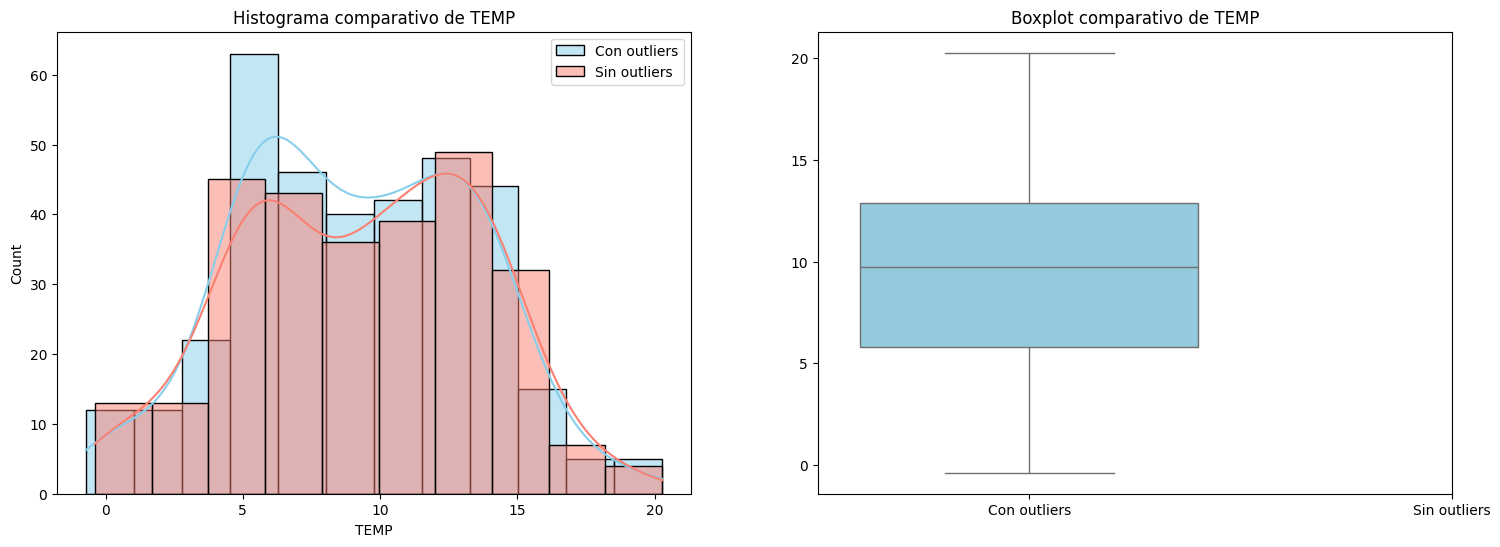

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


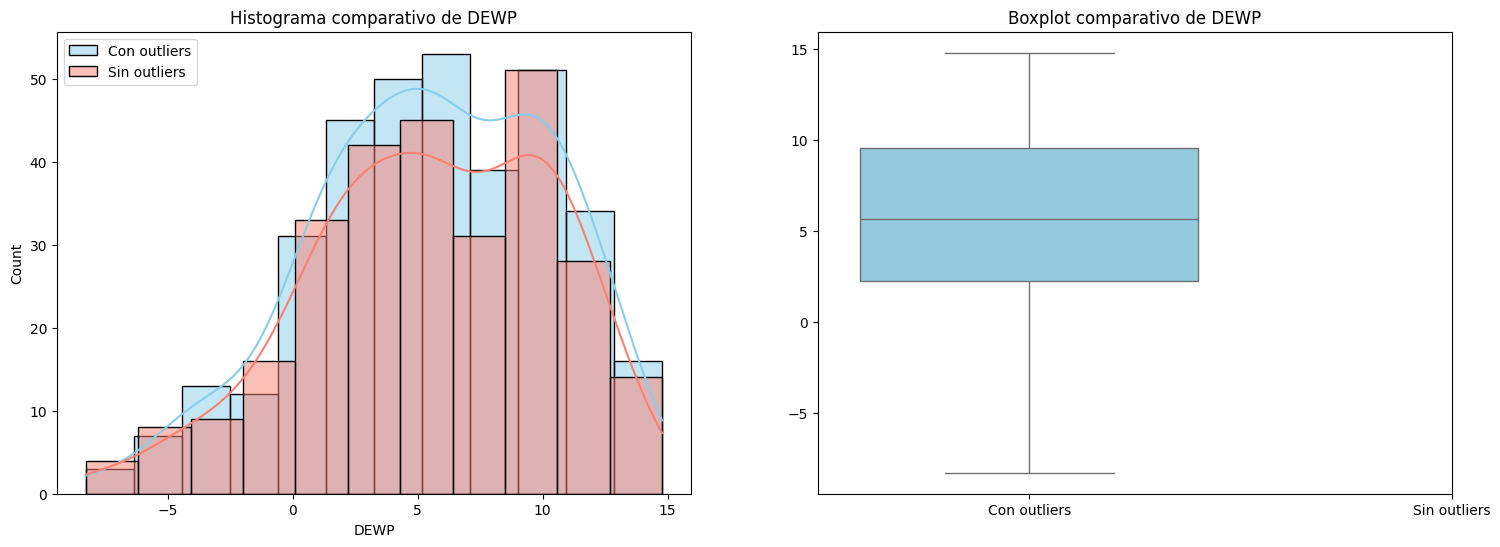

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


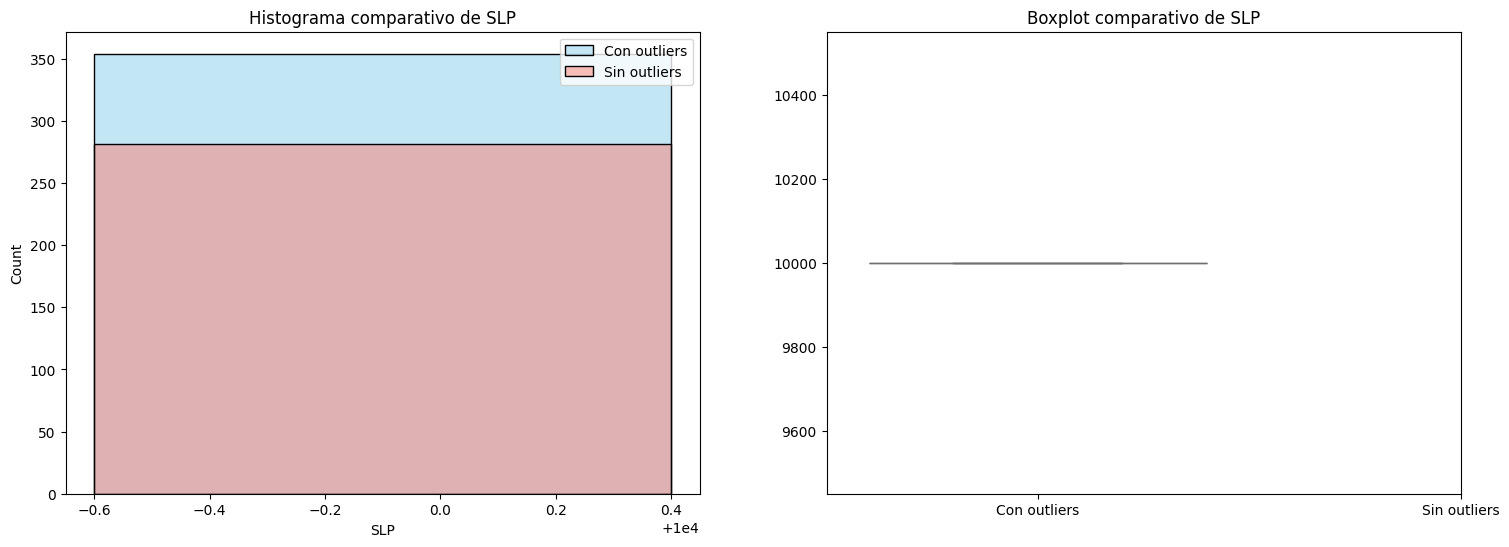

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


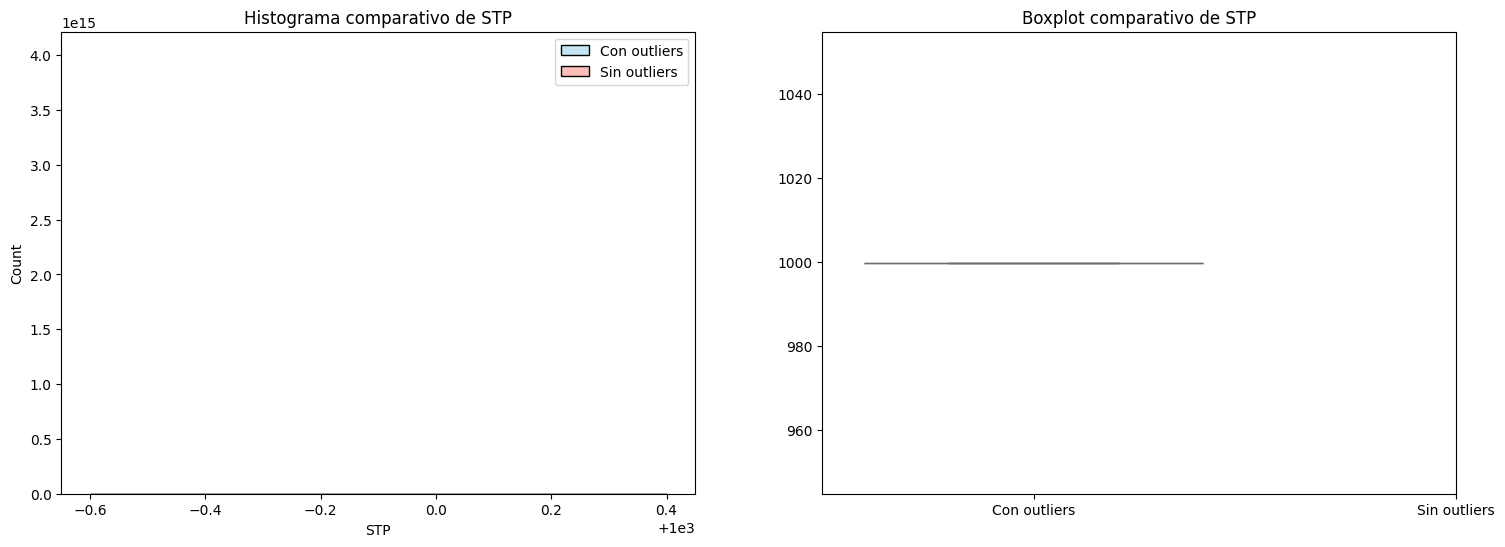

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


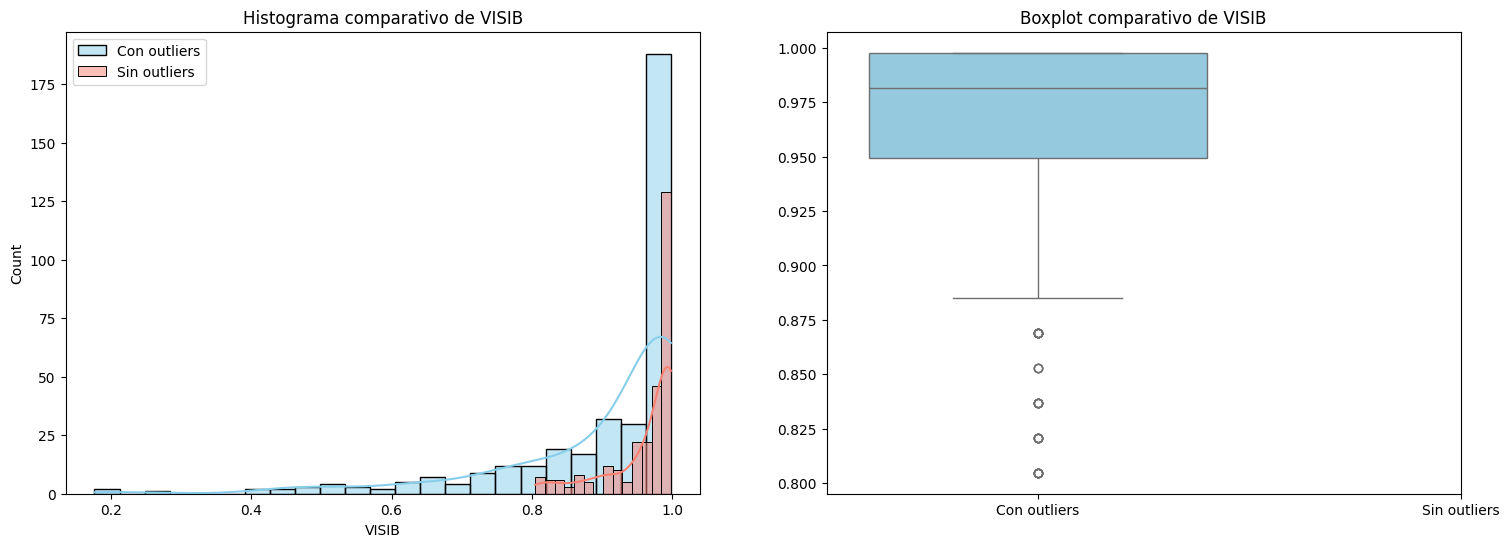

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


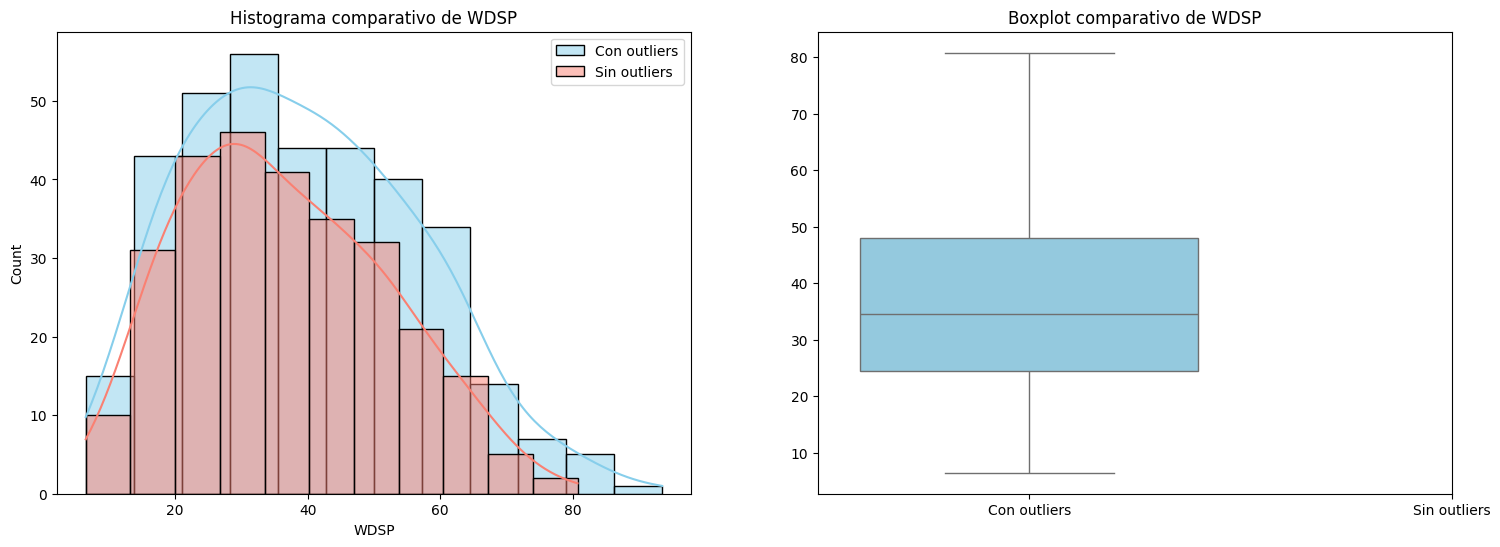

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


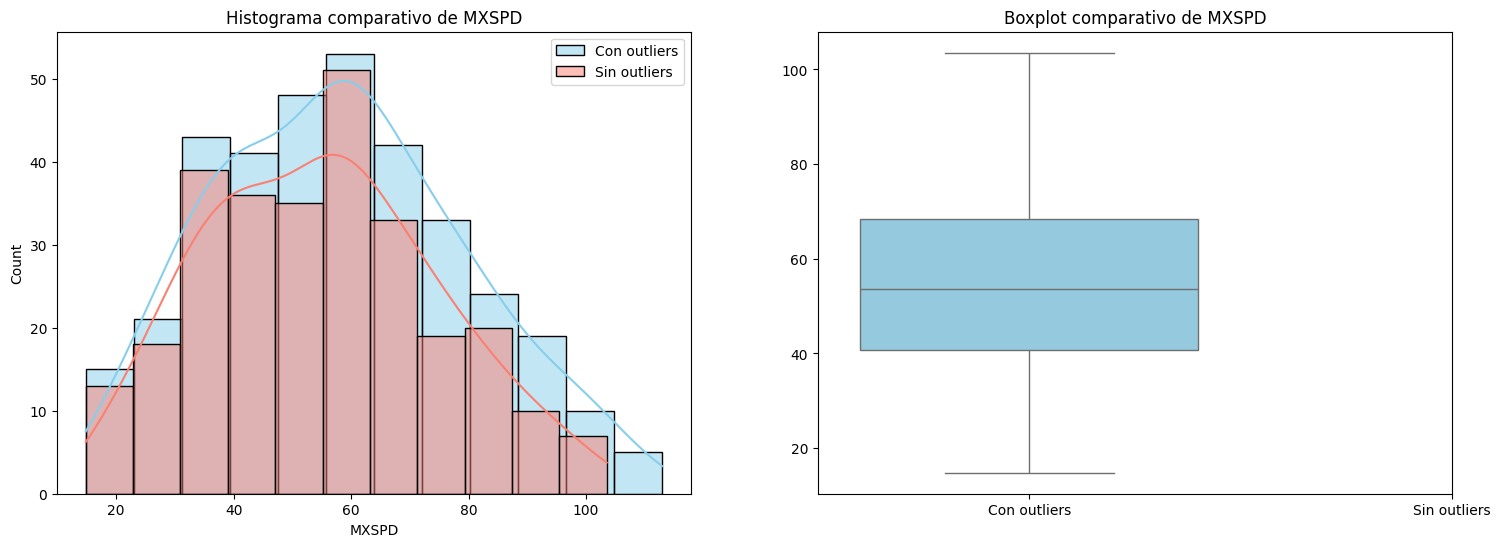

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


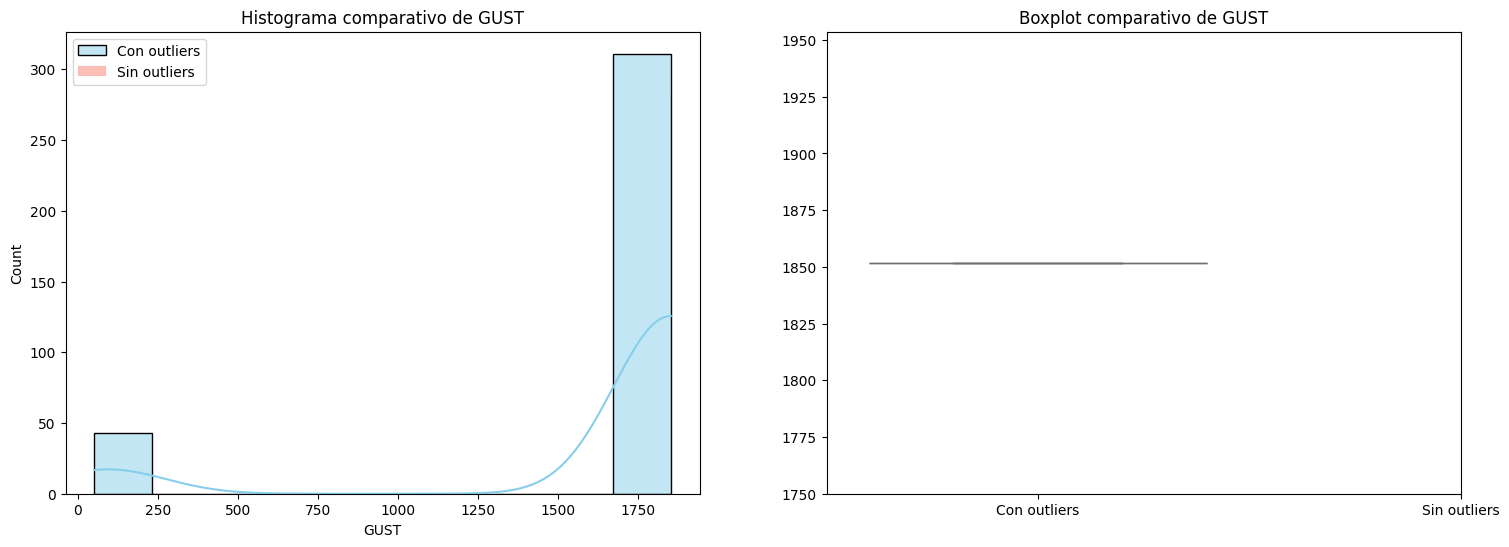

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


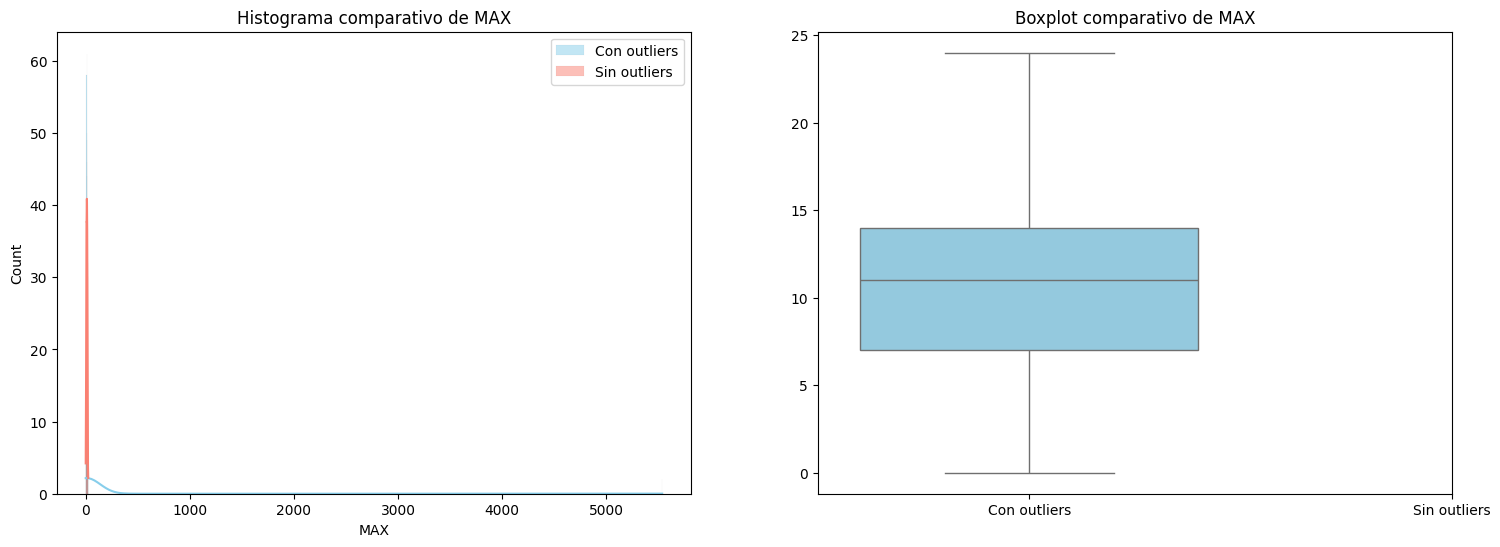

C:\Users\52771\AppData\Local\Temp\ipykernel_256\4109228403.py:23: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_con_outliers[columna], df_sin_outliers[columna]],


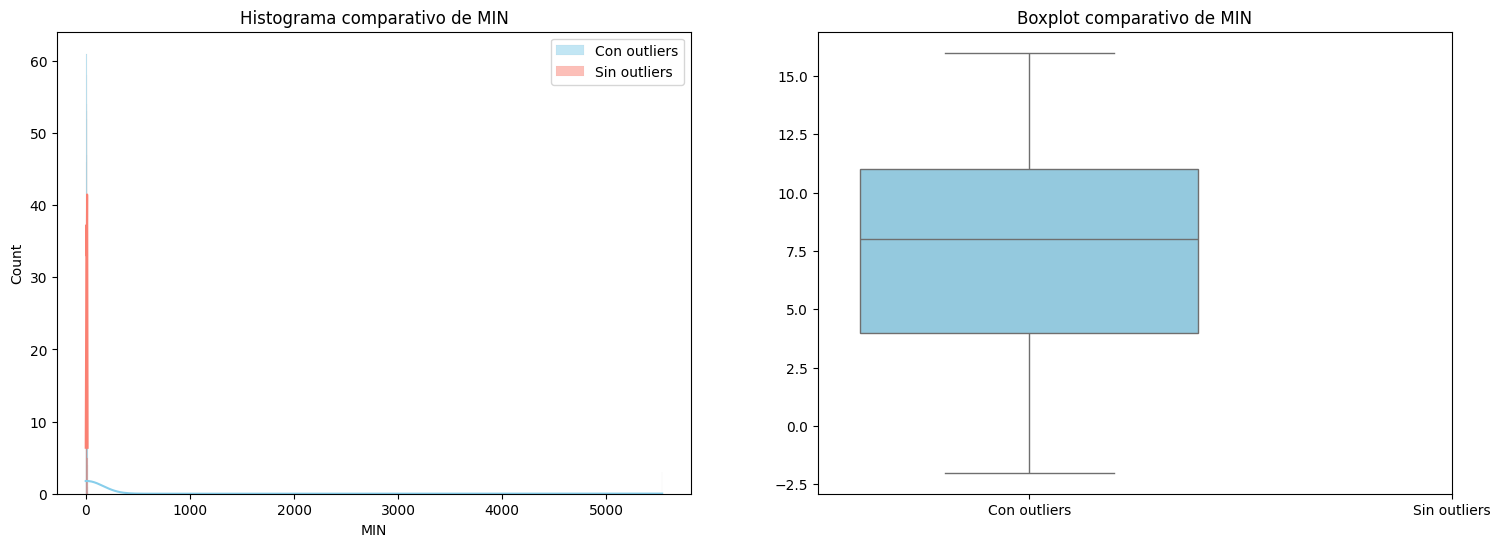

In [35]:
# Visualizaciones comparativas
visualizar_distribucion_comparativa(df_troll_2024_con_outliers, df_troll_2024_sin_outliers, col_lista)

#### Tendencias temporlaes

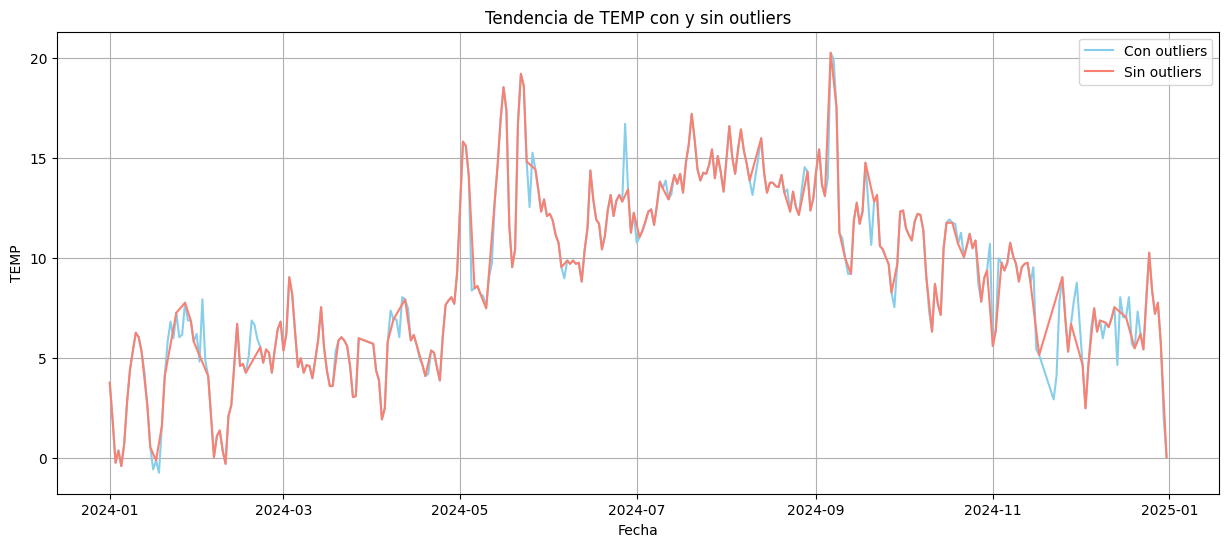

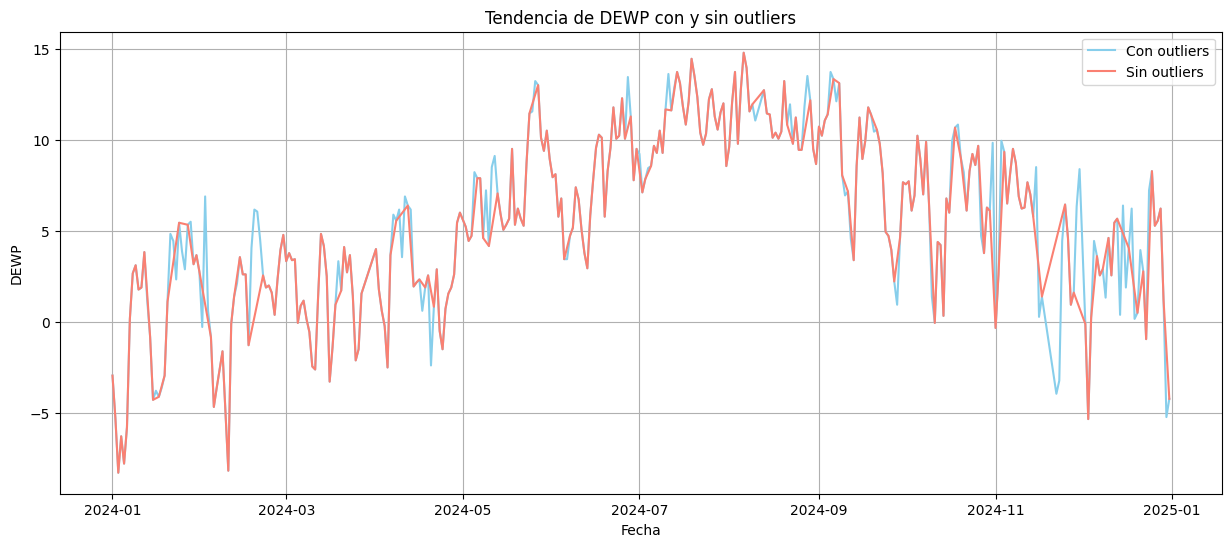

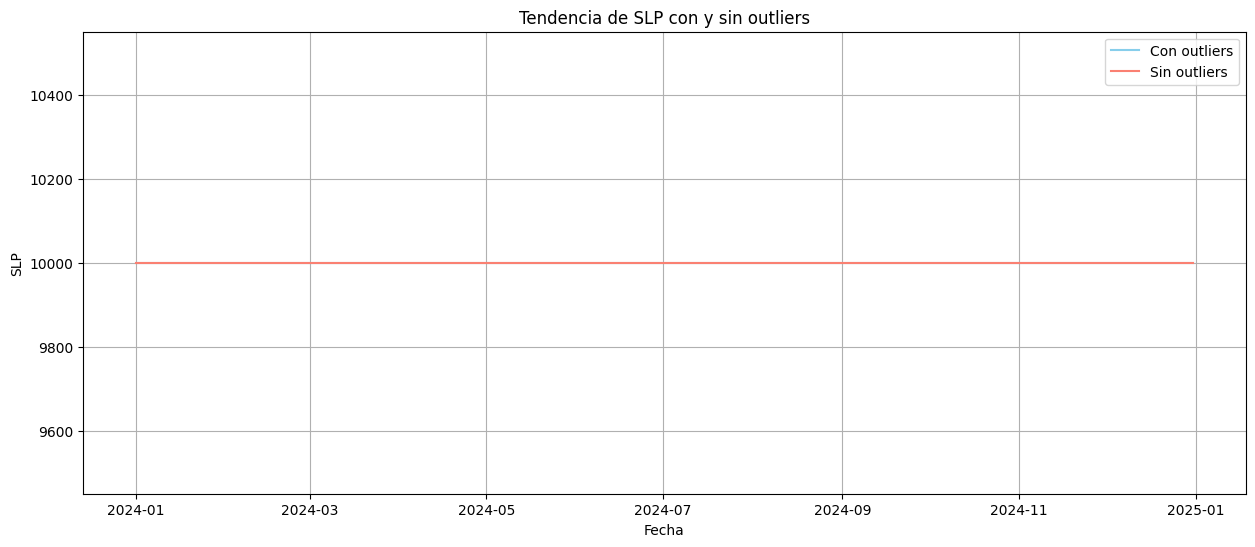

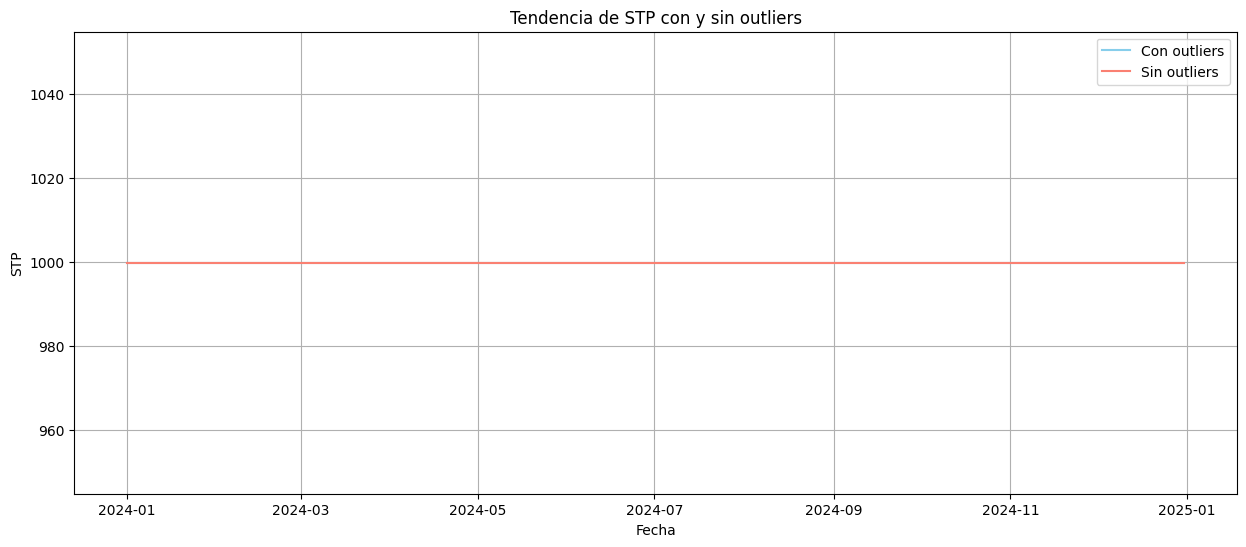

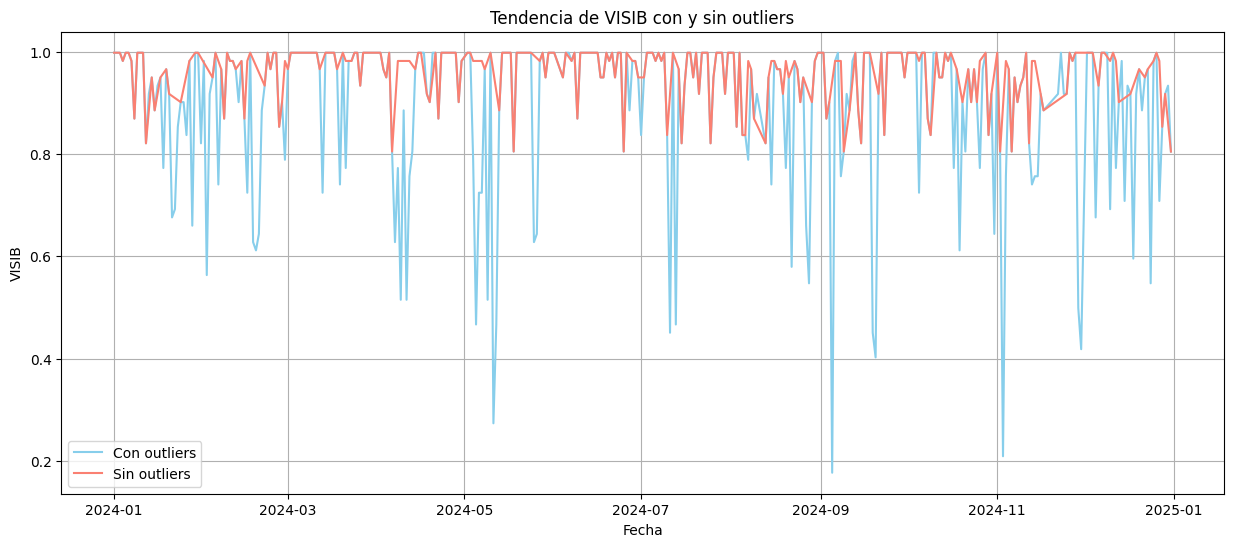

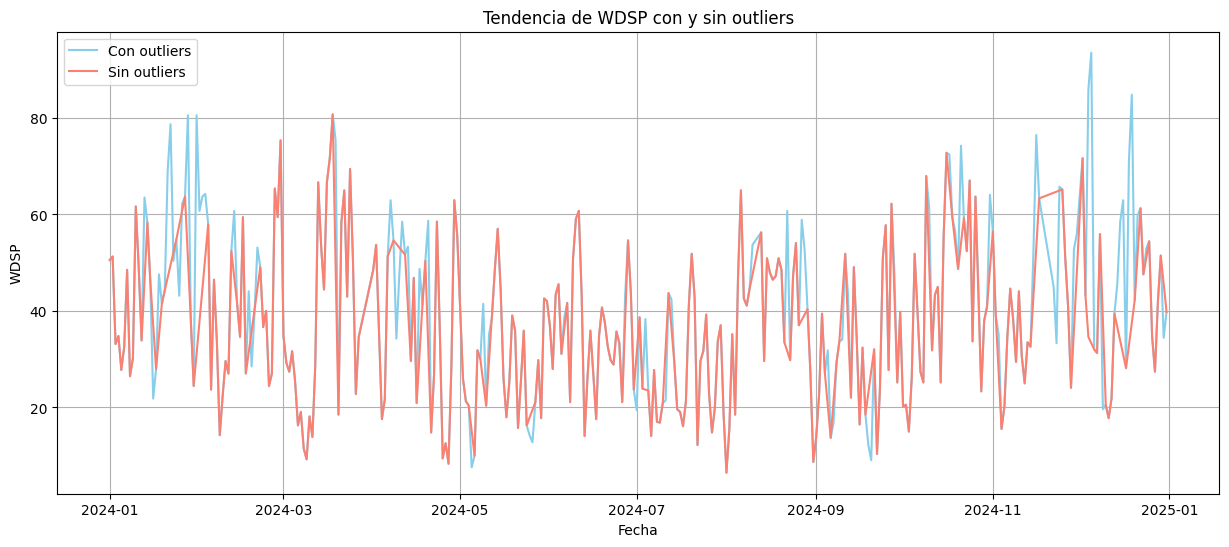

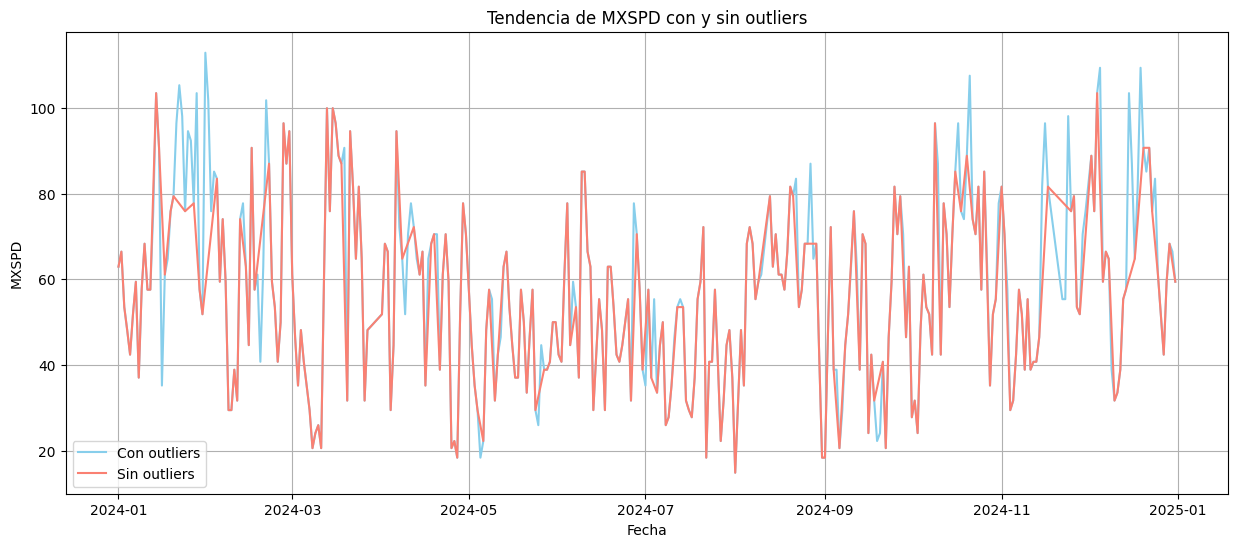

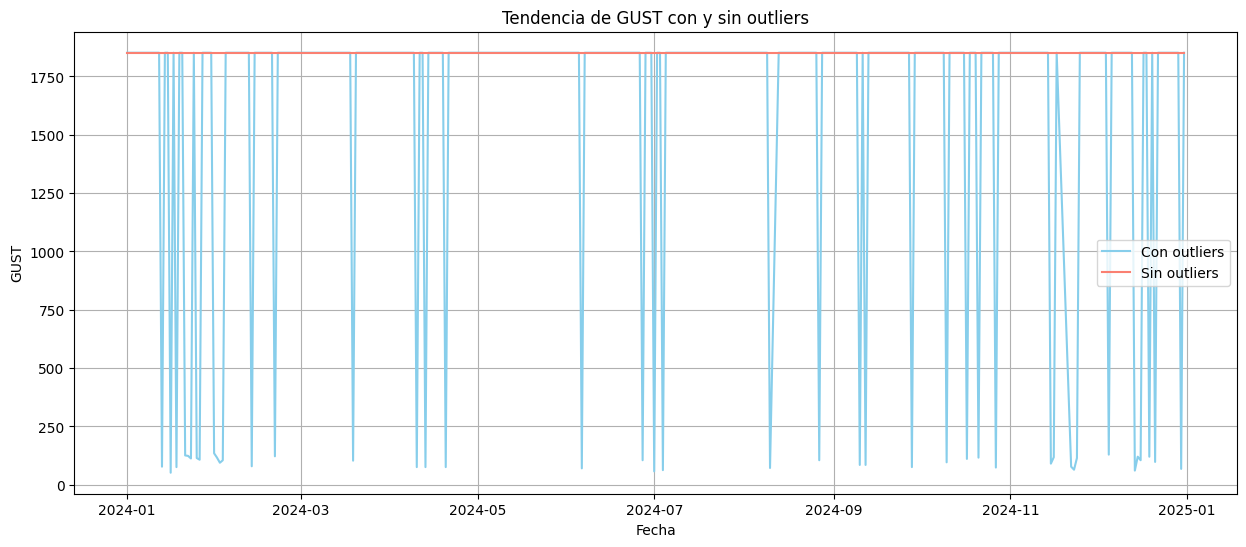

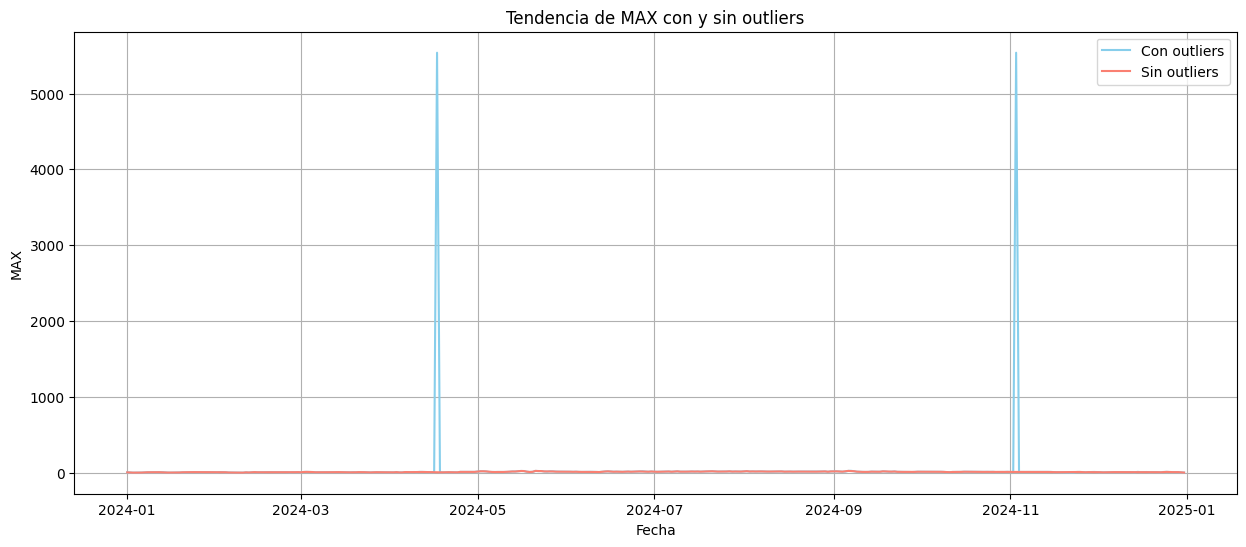

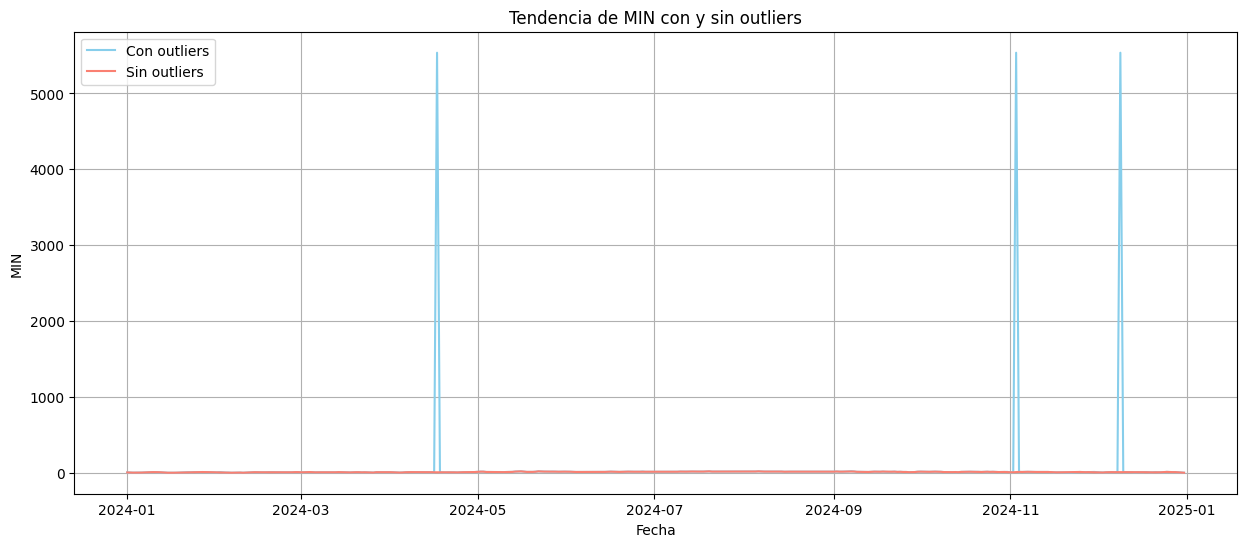

In [42]:
def graficos_lineas_outliers(df_con_outliers, df_sin_outliers, lista_columnas, fecha_columna):
    for columna in lista_columnas:
        plt.figure(figsize=(15, 6))

        # Gráfico de líneas con outliers
        plt.plot(df_con_outliers[fecha_columna], df_con_outliers[columna], label='Con outliers', color='skyblue')

        # Gráfico de líneas sin outliers
        plt.plot(df_sin_outliers[fecha_columna], df_sin_outliers[columna], label='Sin outliers', color='salmon')

        plt.title(f'Tendencia de {columna} con y sin outliers')
        plt.xlabel('Fecha')
        plt.ylabel(columna)
        plt.legend()
        plt.grid(True)
        plt.show()

fecha_columna = 'DATE' 

# Generar gráficos de líneas
graficos_lineas_outliers(df_troll_2024_con_outliers, df_troll_2024_sin_outliers, col_lista, fecha_columna)

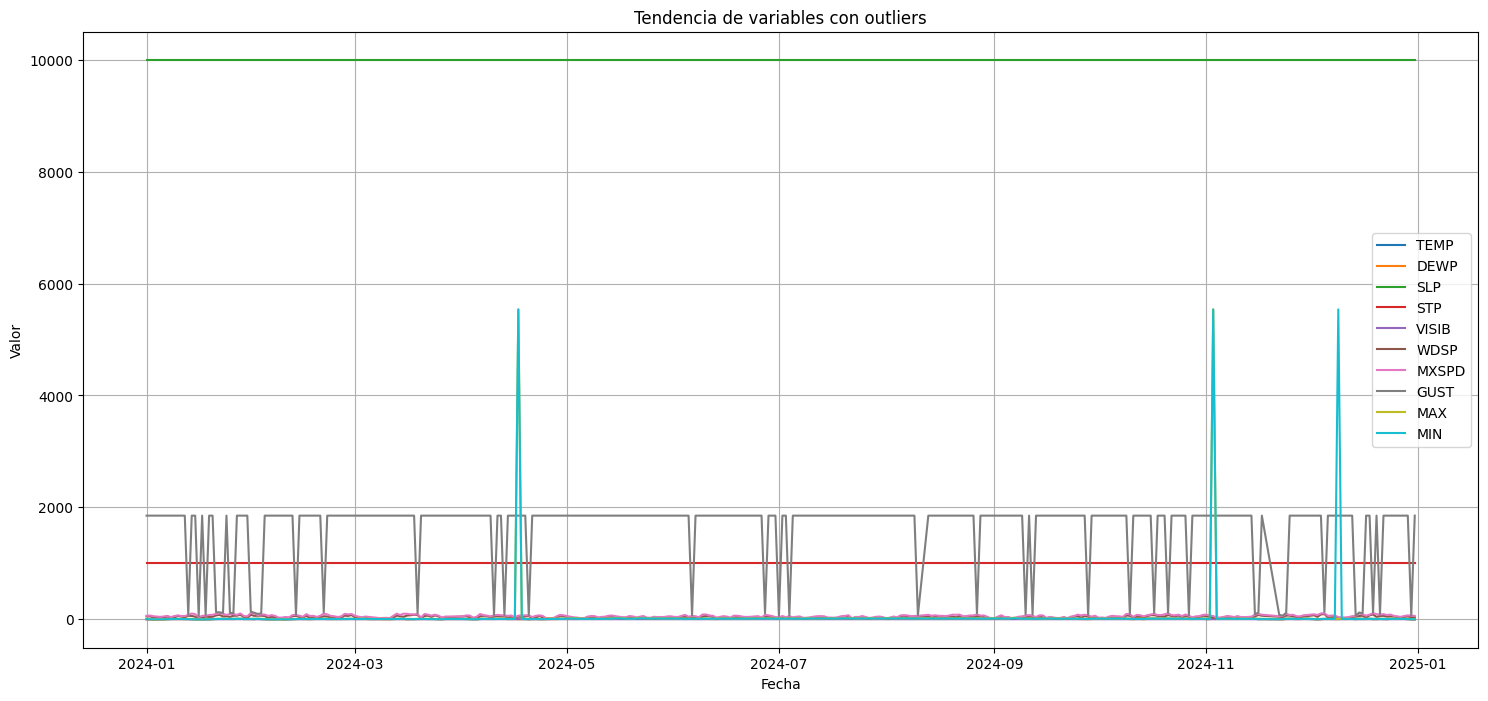

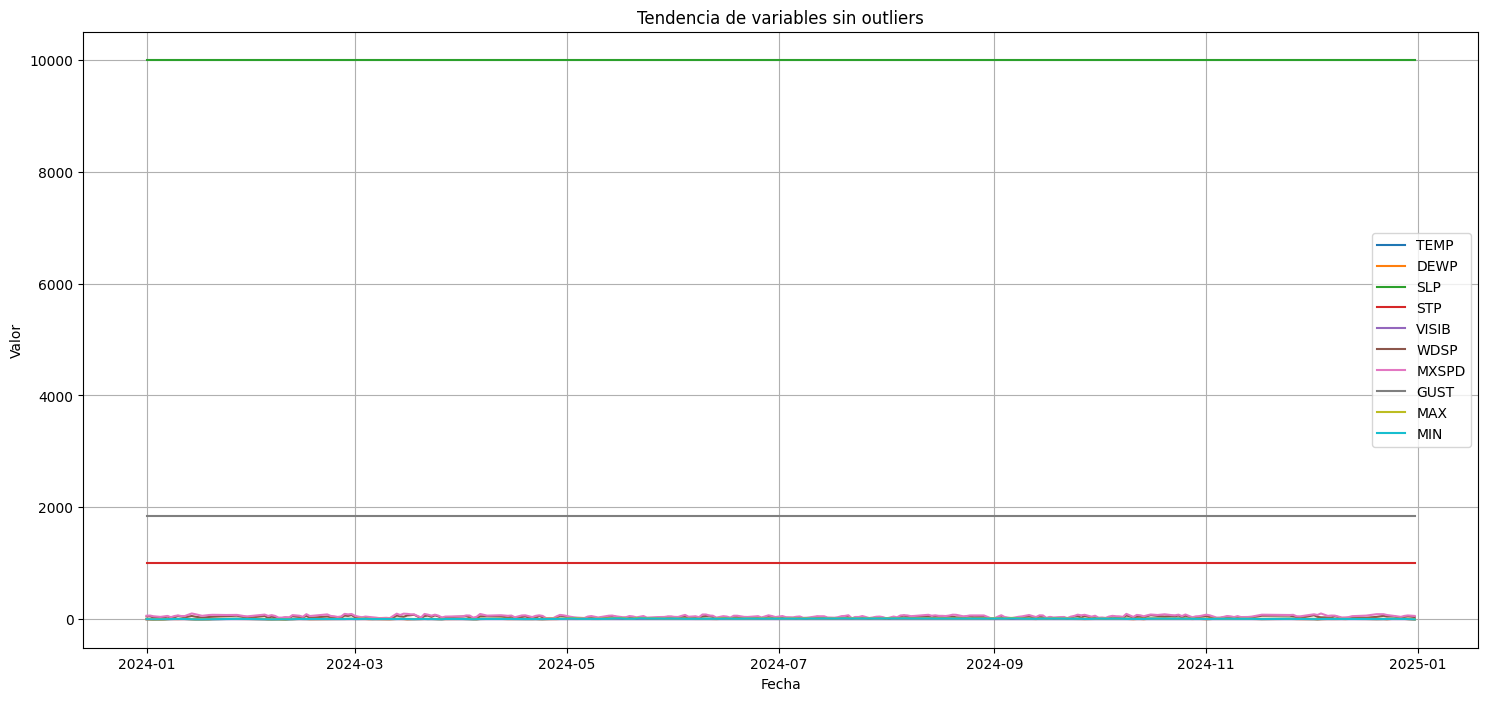

In [41]:
def graficos_lineas_multiples(df, columnas, fecha_columna, titulo):
    plt.figure(figsize=(18, 8))

    for columna in columnas:
        plt.plot(df[fecha_columna], df[columna], label=columna)

    plt.title(titulo)
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

fecha_columna = 'DATE'  # Reemplaza 'DATE' con el nombre de tu columna de fecha

# Generar gráfico de líneas con outliers
graficos_lineas_multiples(df_troll_2024_con_outliers, col_lista, fecha_columna, 'Tendencia de variables con outliers')

# Generar gráfico de líneas sin outliers
graficos_lineas_multiples(df_troll_2024_sin_outliers, col_lista, fecha_columna, 'Tendencia de variables sin outliers')

##### Correlación entre variables

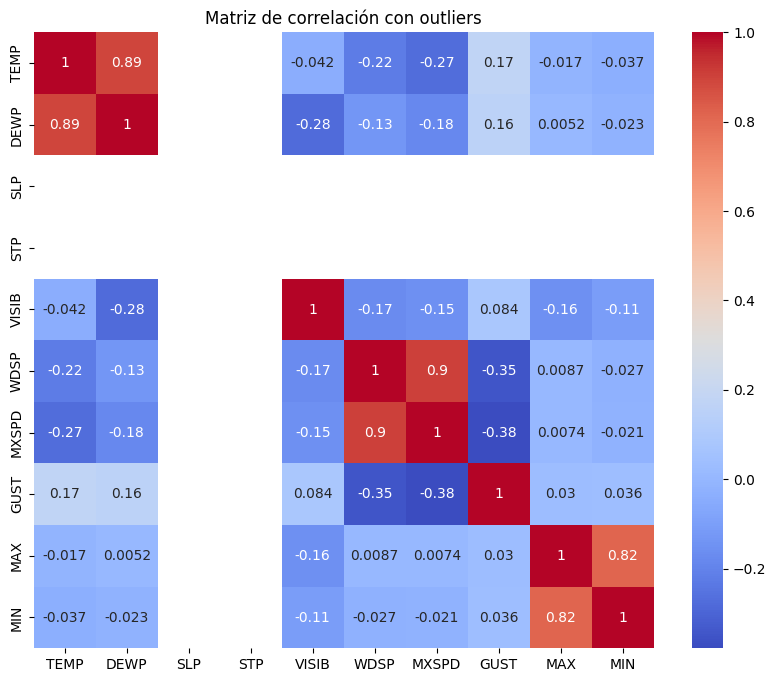

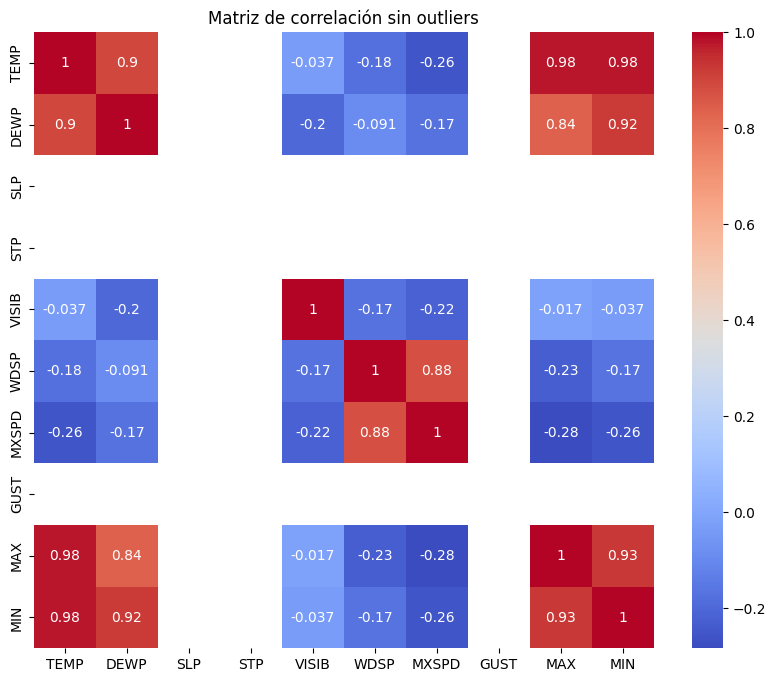

In [48]:
def analisis_correlaciones(df, columnas, title):
    # Matriz de correlación
    matriz_correlacion = df[columnas].corr()

    # Mapa de calor de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

    # Gráficos de dispersión
    # for i in range(len(columnas)):
    #     for j in range(i + 1, len(columnas)):
    #         plt.figure(figsize=(6, 4))
    #         sns.scatterplot(x=columnas[i], y=columnas[j], data=df)
    #         plt.title(f'Dispersión: {columnas[i]} vs {columnas[j]}')
    #         plt.show()


# Analizar correlaciones para el conjunto de datos con outliers
analisis_correlaciones(df_troll_2024_con_outliers, col_lista, 'Matriz de correlación con outliers')

# Analizar correlaciones para el conjunto de datos sin outliers
analisis_correlaciones(df_troll_2024_sin_outliers, col_lista, 'Matriz de correlación sin outliers')

In [ ]:
def outliers(df, columnas_interes):
    outliers_dict = {}

    for col in columnas_interes:
        if col not in df.columns:
            print(f'⚠ Advertencia: la columna {col} no esta en el DataFrame.')

        serie = df[col].dropna() # Evitar errores por NaN    
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]

        if not outliers.empty:
            outliers_dict[col] = {
                'cantidad': len(outliers),
                'índices': outliers.index.tolist(),
                'valores': outliers.tolist()
            }
    return outliers_dict